#Credit Card Fraud Detection

This dataset contains transactions made by credit cards in September 2013 by European cardholders. It presents transactions that occurred over a two-day period, where there are 284,807 transactions, with 492 classified as fraudulent (approximately 0.172% of all transactions). The dataset is highly unbalanced, with the positive class (frauds) representing only a small fraction of the total transactions.

To protect confidentiality, most of the original features are anonymized using PCA (Principal Component Analysis) transformation. These features are named V1, V2, ..., V28. The only features that were not transformed are:

###Time: The number of seconds elapsed between this transaction and the first transaction in the dataset.

###Amount: The transaction amount.

###Class: The response variable, where 1 indicates a fraudulent transaction and 0 indicates a legitimate transaction.


##⚙️ Use Cases
-Supervised classification tasks

-Model performance evaluation on imbalanced datasets

-Fraud detection systems and real-time anomaly detection

#Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix , mean_absolute_error , mean_squared_error , r2_score , f1_score , precision_score, recall_score
from tensorflow.keras.layers import Dense, Dropout
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam


#Read Data

In [ ]:
df = pd.read_csv("/content/creditcard.csv")

#EDA

In [ ]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
df.isnull().sum()

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


In [ ]:
df.shape

(284807, 31)

In [ ]:
df.duplicated().sum()

np.int64(1081)

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
class_counts = df['Class'].value_counts()
print("\nClass Distribution:")
print(class_counts)
print("\nPercentage of Fraudulent Transactions:",
      (class_counts[1] / class_counts.sum() * 100).round(4), "%")


Class Distribution:
Class
0    283253
1       473
Name: count, dtype: int64

Percentage of Fraudulent Transactions: 0.1667 %


# Visualization

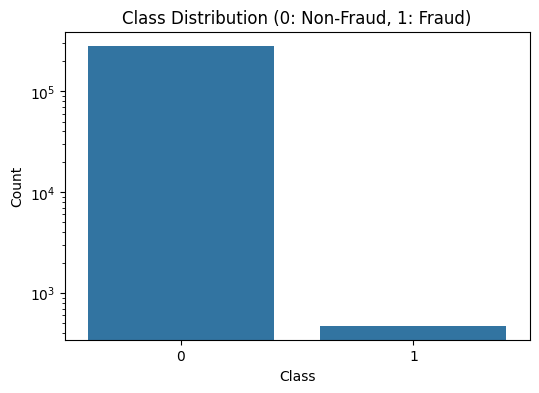

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Class', data=df)
plt.title('Class Distribution (0: Non-Fraud, 1: Fraud)')
plt.xlabel('Class')
plt.ylabel('Count')
plt.yscale('log')
plt.show()

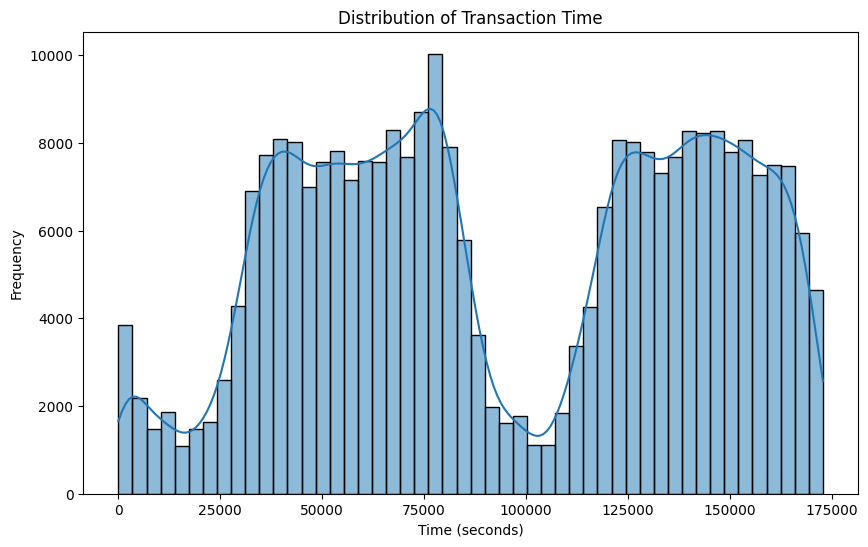

In [ ]:

plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Time', bins=50, kde=True)
plt.title('Distribution of Transaction Time')
plt.xlabel('Time (seconds)')
plt.ylabel('Frequency')
plt.show()

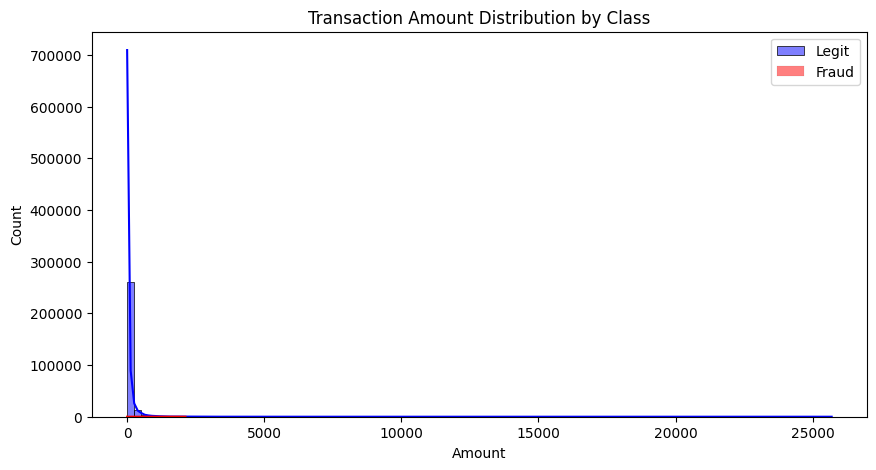

In [ ]:
plt.figure(figsize=(10,5))
sns.histplot(df[df['Class'] == 0]['Amount'], bins=100, color='blue', label='Legit', kde=True)
sns.histplot(df[df['Class'] == 1]['Amount'], bins=100, color='red', label='Fraud', kde=True)
plt.legend()
plt.title('Transaction Amount Distribution by Class')
plt.show()


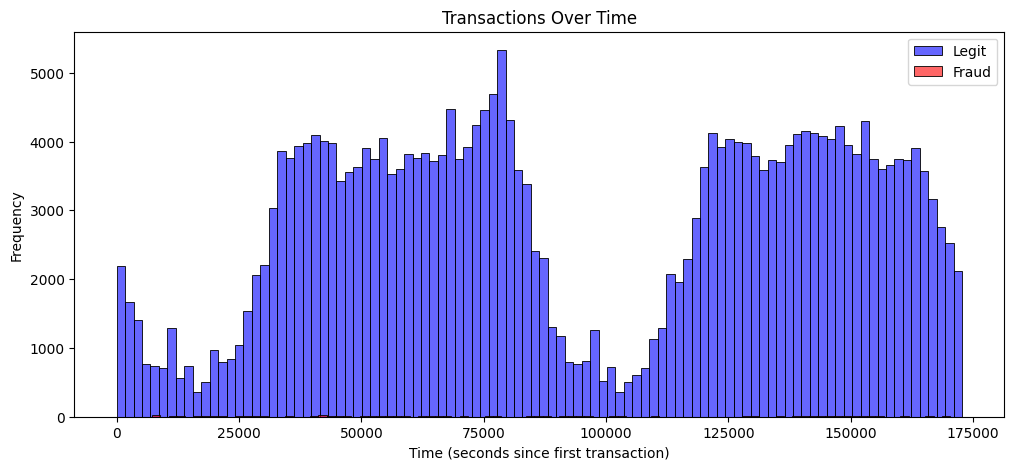

In [ ]:
# 3. Transactions Over Time
plt.figure(figsize=(12,5))
sns.histplot(df[df['Class'] == 0]['Time'], bins=100, color='blue', label='Legit', alpha=0.6)
sns.histplot(df[df['Class'] == 1]['Time'], bins=100, color='red', label='Fraud', alpha=0.6)
plt.title("Transactions Over Time")
plt.xlabel("Time (seconds since first transaction)")
plt.ylabel("Frequency")
plt.legend()
plt.show()

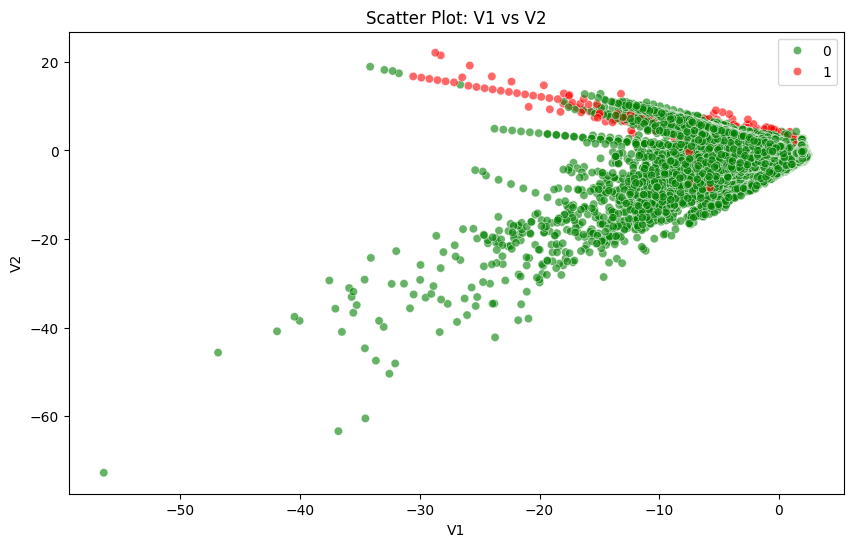

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='V1', y='V2', hue='Class', data=df, alpha=0.6, palette={0:'green', 1:'red'})
plt.title("Scatter Plot: V1 vs V2")
plt.xlabel("V1")
plt.ylabel("V2")
plt.legend()
plt.show()

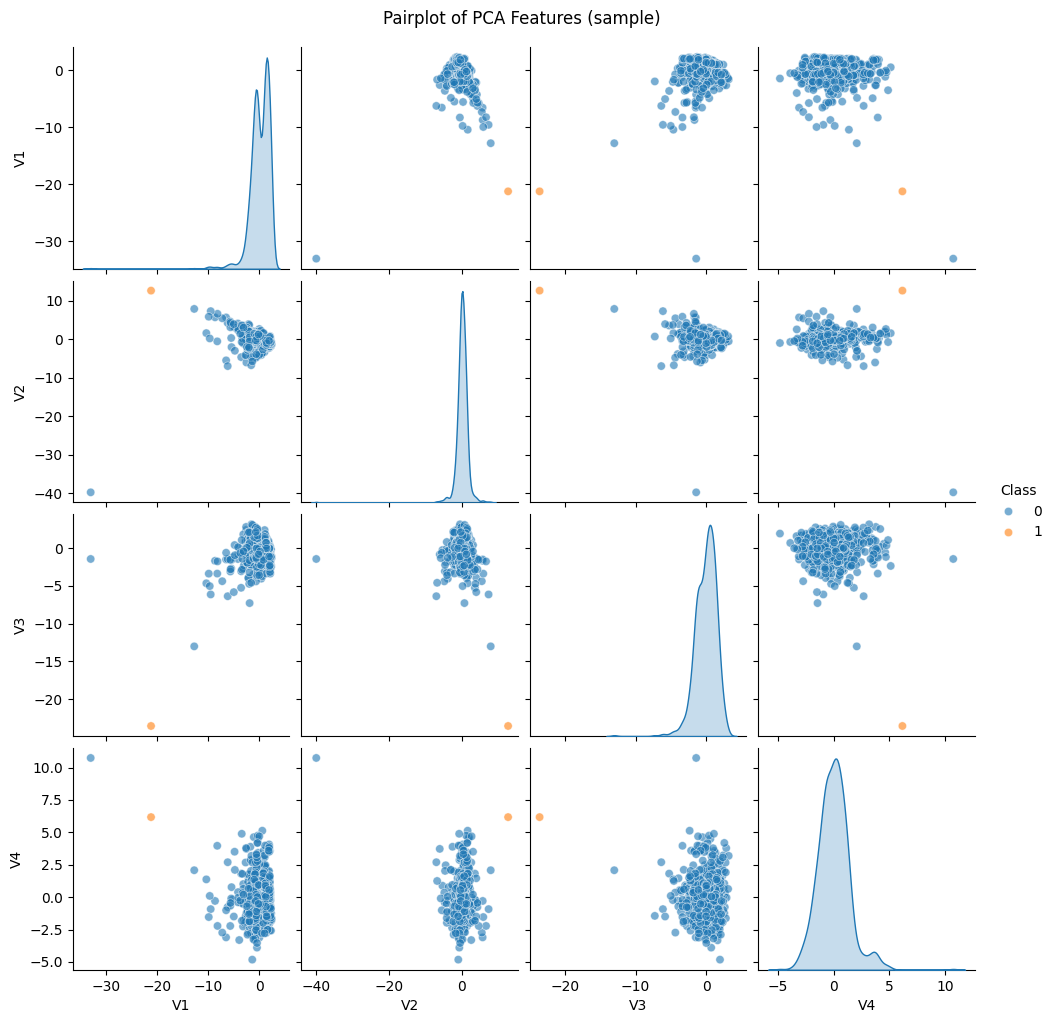

In [ ]:
sample_df = df.sample(1000, random_state=1)
sns.pairplot(sample_df, vars=['V1', 'V2', 'V3', 'V4'], hue='Class', plot_kws={'alpha':0.6})
plt.suptitle("Pairplot of PCA Features (sample)", y=1.02)
plt.show()

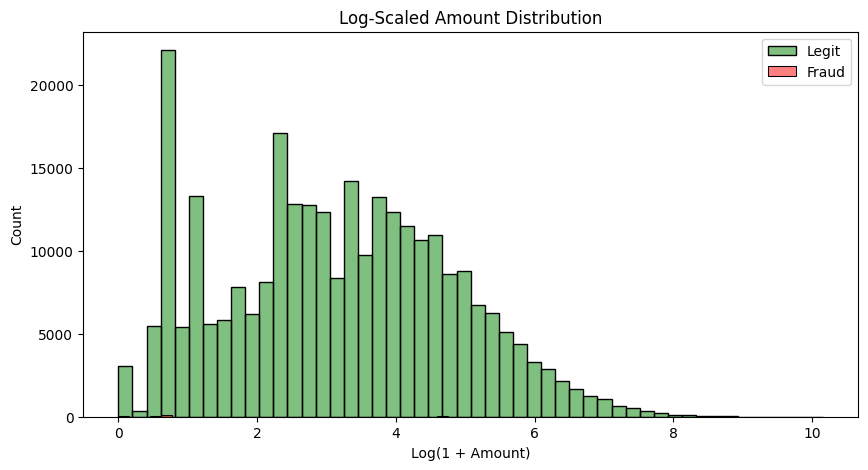

In [ ]:
df['LogAmount'] = np.log1p(df['Amount'])

plt.figure(figsize=(10,5))
sns.histplot(df[df['Class'] == 0]['LogAmount'], color='green', label='Legit', bins=50, alpha=0.5)
sns.histplot(df[df['Class'] == 1]['LogAmount'], color='red', label='Fraud', bins=50, alpha=0.5)
plt.title("Log-Scaled Amount Distribution")
plt.xlabel("Log(1 + Amount)")
plt.legend()
plt.show()

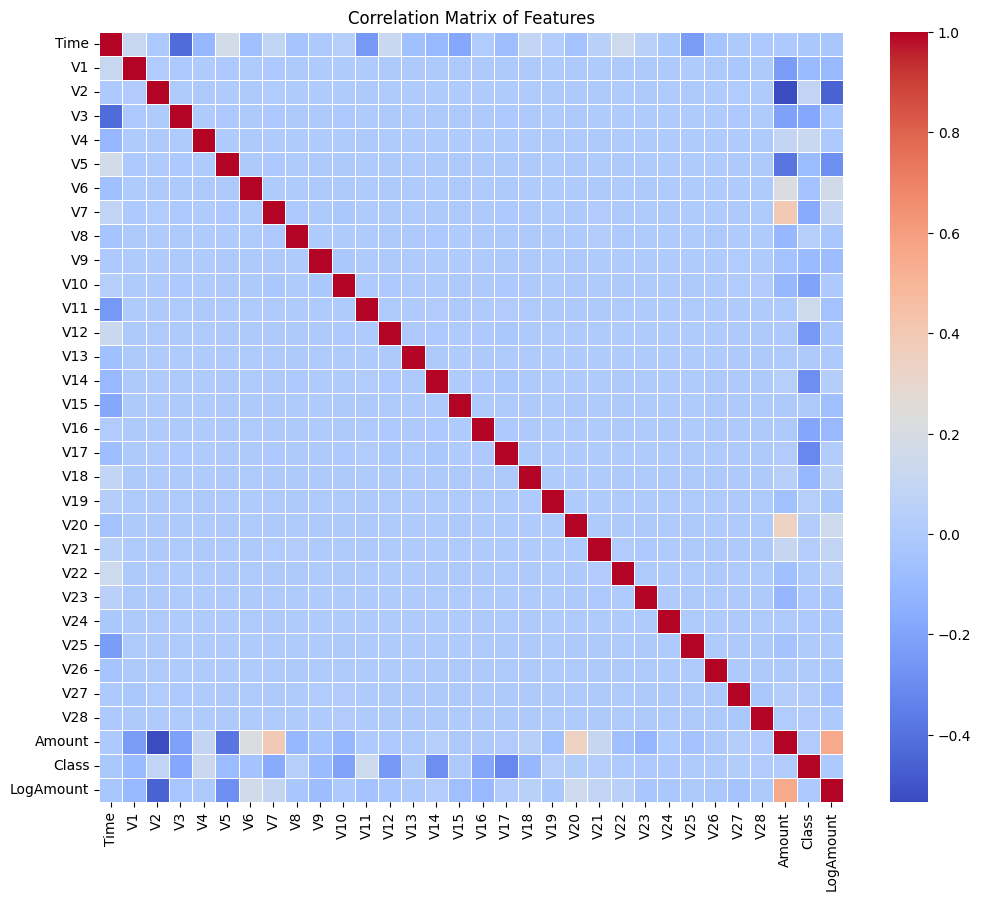

In [ ]:
plt.figure(figsize=(12, 10))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Features')
plt.show()

In [ ]:
print("\nCorrelation of Features with Class:")
print(corr_matrix['Class'].sort_values(ascending=False))


Correlation of Features with Class:
Class        1.000000
V11          0.149067
V4           0.129326
V2           0.084624
V19          0.033631
V8           0.033068
V21          0.026357
V27          0.021892
V20          0.021486
V28          0.009682
Amount       0.005777
V22          0.004887
V26          0.004265
V25          0.003202
V15         -0.003300
V13         -0.003897
V23         -0.006333
V24         -0.007210
LogAmount   -0.007798
Time        -0.012359
V6          -0.043915
V5          -0.087812
V9          -0.094021
V1          -0.094486
V18         -0.105340
V7          -0.172347
V3          -0.182322
V16         -0.187186
V10         -0.206971
V12         -0.250711
V14         -0.293375
V17         -0.313498
Name: Class, dtype: float64


In [ ]:
print("\nSummary Statistics for Amount by Class:")
print(df.groupby('Class')['Amount'].describe())
print("\nSummary Statistics for Time by Class:")
print(df.groupby('Class')['Time'].describe())


Summary Statistics for Amount by Class:
          count        mean         std  min   25%    50%     75%       max
Class                                                                      
0      283253.0   88.413575  250.379023  0.0  5.67  22.00   77.46  25691.16
1         473.0  123.871860  260.211041  0.0  1.00   9.82  105.89   2125.87

Summary Statistics for Time by Class:
          count          mean           std    min      25%      50%  \
Class                                                                  
0      283253.0  94835.058093  47475.550607    0.0  54233.0  84711.0   
1         473.0  80450.513742  48636.179973  406.0  41203.0  73408.0   

            75%       max  
Class                      
0      139308.0  172792.0  
1      129095.0  170348.0  


#Preprocessing

## Remove Outliers

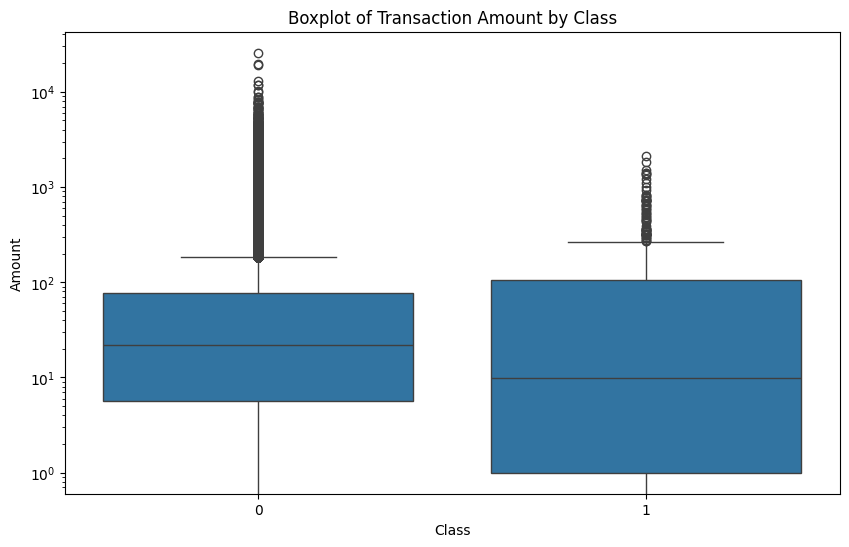

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Class', y='Amount', data=df)
plt.title('Boxplot of Transaction Amount by Class')
plt.yscale('log')
plt.show()

In [ ]:
# def remove_outliers(df, column):
#     Q1 = df[column].quantile(0.25)
#     Q3 = df[column].quantile(0.75)
#     IQR = Q3 - Q1
#     lower_bound = Q1 - 1.5 * IQR
#     upper_bound = Q3 + 1.5 * IQR
#     return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

In [ ]:

# df = remove_outliers(df, 'Amount')
# print("Shape after outlier removal:", df.shape)

In [ ]:
# plt.figure(figsize=(10, 6))
# sns.boxplot(x='Class', y='Amount', data=df)
# plt.title('Boxplot of Transaction Amount by Class')
# plt.yscale('log')
# plt.show()

In [ ]:
X = df.drop('Class', axis=1)
y = df['Class']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

##Handel imbalancing

In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy='minority', random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

##Normalization

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

##Important Features


Feature Importance:
      Feature  Importance
14        V14    0.224259
10        V10    0.165757
12        V12    0.103195
4          V4    0.100097
11        V11    0.073652
17        V17    0.062131
3          V3    0.055167
7          V7    0.028430
16        V16    0.025559
2          V2    0.023705
9          V9    0.022886
21        V21    0.013864
18        V18    0.013630
0        Time    0.009232
6          V6    0.009001
1          V1    0.006524
8          V8    0.005253
30  LogAmount    0.005229
13        V13    0.005045
27        V27    0.004931
19        V19    0.004696
28        V28    0.004529
29     Amount    0.004316
23        V23    0.004093
15        V15    0.003981
26        V26    0.003837
5          V5    0.003698
24        V24    0.003512
25        V25    0.003473
20        V20    0.003344
22        V22    0.002972


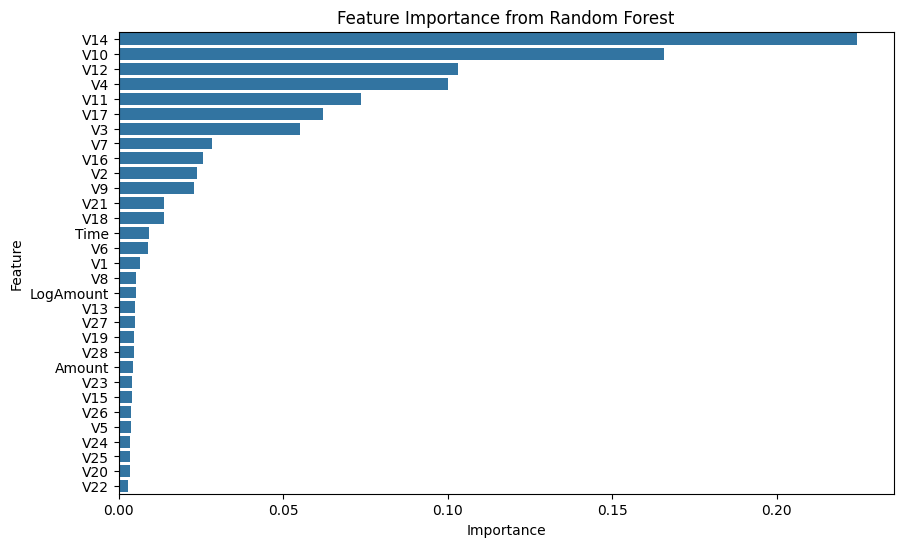

In [ ]:

rf_temp = RandomForestClassifier(random_state=42)
rf_temp.fit(X_train, y_train)
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_temp.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("\nFeature Importance:")
print(feature_importance)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title('Feature Importance from Random Forest')
plt.show()

In [ ]:
low_importance_features = feature_importance[feature_importance['Importance'] < 0.01]['Feature']
X_train = pd.DataFrame(X_train, columns=X.columns)
X_test = pd.DataFrame(X_test, columns=X.columns)

X_train = X_train.drop(columns=low_importance_features)
X_test = X_test.drop(columns=low_importance_features)
print("\nFeatures removed:", low_importance_features.tolist())
print("New training data shape:", X_train.shape)


Features removed: ['Time', 'V6', 'V1', 'V8', 'LogAmount', 'V13', 'V27', 'V19', 'V28', 'Amount', 'V23', 'V15', 'V26', 'V5', 'V24', 'V25', 'V20', 'V22']
New training data shape: (453194, 13)


In [ ]:
models ={
    'LogisticRegression' : LogisticRegression(),
    'SVC' : SVC(C=10, gamma=0.05, kernel='rbf'),
    'GaussianNB' : GaussianNB(),
    'Decision Tree Classifier': DecisionTreeClassifier( max_depth=10,random_state=42),
    'Random Forest Classifier': RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42),
    #'KNN Classifier': KNeighborsClassifier(n_neighbors=5)

}

In [ ]:
accuracy = []

for model_name, model in models.items():
    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)


    acc_train = accuracy_score(y_train, y_train_pred)
    acc_test = accuracy_score(y_test, y_test_pred)

    MSE_train = mean_squared_error(y_train, y_train_pred)
    MSE_test = mean_squared_error(y_test, y_test_pred)

    Recall_train = recall_score(y_train, y_train_pred, average='weighted')
    Recall_test = recall_score(y_test, y_test_pred, average='weighted')

    Precision_train = precision_score(y_train, y_train_pred, average='weighted')
    Precision_test = precision_score(y_test, y_test_pred, average='weighted')

    F1_train = f1_score(y_train, y_train_pred, average='weighted')
    F1_test = f1_score(y_test, y_test_pred, average='weighted')

    accuracy.append([
        model_name, acc_train, acc_test,
        MSE_train, MSE_test,
        Recall_train, Recall_test,
        Precision_train, Precision_test,
        F1_train, F1_test
    ])

df_results = pd.DataFrame(accuracy, columns=[
    "Model", "Accuracy_train", "Accuracy_test",
    "MSE_train", "MSE_test",
    "Recall_train", "Recall_test",
    "Precision_train", "Precision_test",
    "F1_train", "F1_test"
], index=models.keys())

df_results

,Model,Accuracy_train,Accuracy_test,MSE_train,MSE_test,Recall_train,Recall_test,Precision_train,Precision_test,F1_train,F1_test
LogisticRegression,LogisticRegression,0.973305,0.989039,0.026695,0.010961,0.973305,0.989039,0.973796,0.998360,0.973298,0.993219
SVC,SVC,0.987687,0.991858,0.012313,0.008142,0.987687,0.991858,0.987733,0.998296,0.987687,0.994701
GaussianNB,GaussianNB,0.934178,0.981955,0.065822,0.018045,0.934178,0.981955,0.938340,0.998197,0.934022,0.989507
Decision Tree Classifier,Decision Tree Classifier,0.989318,0.987365,0.010682,0.012635,0.989318,0.987365,0.989319,0.998241,0.989318,0.992323
Random Forest Classifier,Random Forest Classifier,0.992028,0.998273,0.007972,0.001727,0.992028,0.998273,0.992115,0.998884,0.992027,0.998504



Results for LogisticRegression:
Confusion Matrix:
[[56047   609]
 [   13    77]]


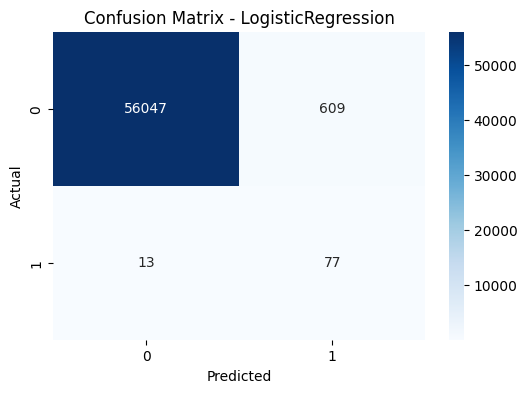


Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     56656
           1       0.11      0.86      0.20        90

    accuracy                           0.99     56746
   macro avg       0.56      0.92      0.60     56746
weighted avg       1.00      0.99      0.99     56746


Results for SVC:
Confusion Matrix:
[[56213   443]
 [   19    71]]


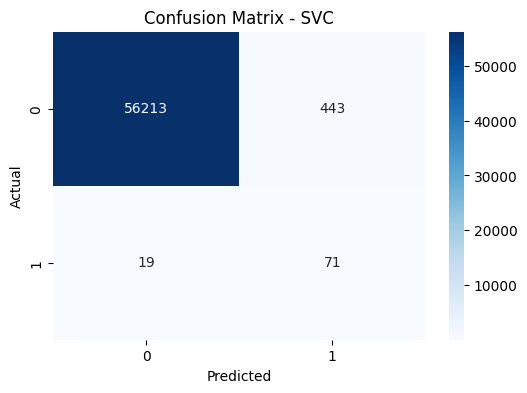


Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     56656
           1       0.14      0.79      0.24        90

    accuracy                           0.99     56746
   macro avg       0.57      0.89      0.62     56746
weighted avg       1.00      0.99      0.99     56746


Results for GaussianNB:
Confusion Matrix:
[[55650  1006]
 [   18    72]]


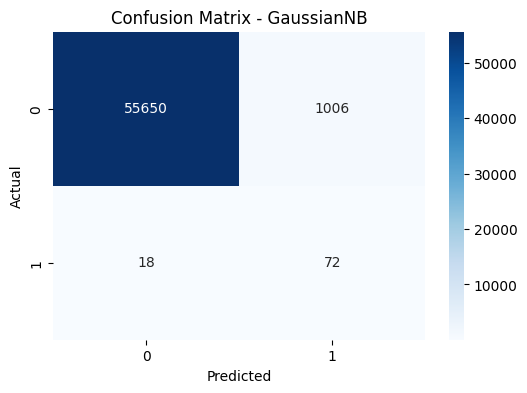


Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56656
           1       0.07      0.80      0.12        90

    accuracy                           0.98     56746
   macro avg       0.53      0.89      0.56     56746
weighted avg       1.00      0.98      0.99     56746


Results for Decision Tree Classifier:
Confusion Matrix:
[[55957   699]
 [   18    72]]


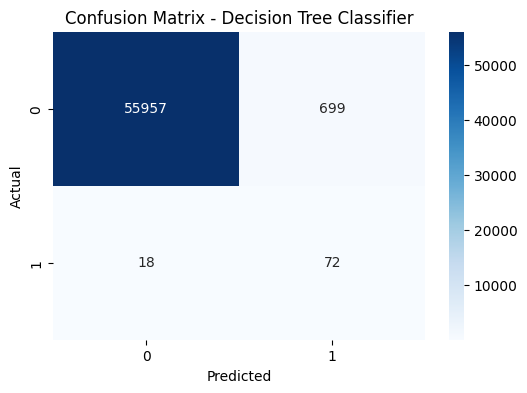


Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     56656
           1       0.09      0.80      0.17        90

    accuracy                           0.99     56746
   macro avg       0.55      0.89      0.58     56746
weighted avg       1.00      0.99      0.99     56746


Results for Random Forest Classifier:
Confusion Matrix:
[[56574    82]
 [   16    74]]


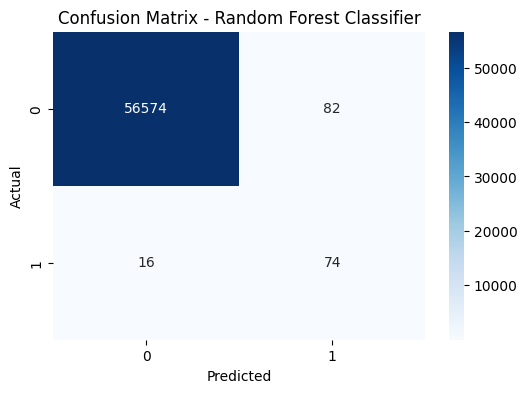


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56656
           1       0.47      0.82      0.60        90

    accuracy                           1.00     56746
   macro avg       0.74      0.91      0.80     56746
weighted avg       1.00      1.00      1.00     56746



In [ ]:
for name, model in models.items():
    print(f"\nResults for {name}:\n{'='*30}")

    model.fit(X_train, y_train)

    y_test_pred = model.predict(X_test)

    cm = confusion_matrix(y_test, y_test_pred)
    print("Confusion Matrix:")
    print(cm)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['0','1'],
                yticklabels=['0','1'])
    plt.title(f'Confusion Matrix - {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')

    plt.show()

    print("\nClassification Report:")
    print(classification_report(y_test, y_test_pred, target_names=['0','1']))


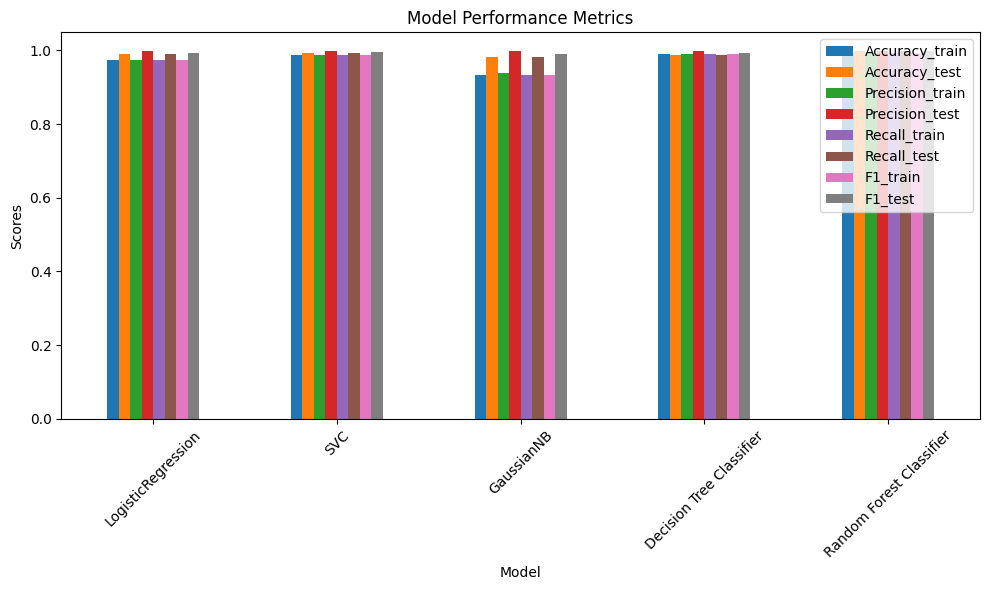

In [ ]:
df_results.plot(x='Model', y=['Accuracy_train', 'Accuracy_test', 'Precision_train', 'Precision_test', 'Recall_train', 'Recall_test', 'F1_train', 'F1_test'], kind='bar', figsize=(10, 6))
plt.xlabel('Model')
plt.ylabel('Scores')
plt.title('Model Performance Metrics')
plt.xticks(rotation=45)
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

#MLP

In [ ]:
model = Sequential()
model.add(Dense(32, input_dim=X_train.shape[1], activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=20, batch_size=2048, validation_split=0.2)

y_pred = (model.predict(X_test) > 0.5).astype(int)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
178/178 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.8276 - loss: 0.4220 - val_accuracy: 0.8891 - val_loss: 0.2661
Epoch 2/20
178/178 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9539 - loss: 0.1508 - val_accuracy: 0.9265 - val_loss: 0.1859
Epoch 3/20
178/178 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.9645 - loss: 0.1183 - val_accuracy: 0.9377 - val_loss: 0.1594
Epoch 4/20
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9689 - loss: 0.1018 - val_accuracy: 0.9478 - val_loss: 0.1272
Epoch 5/20
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9720 - loss: 0.0904 - val_accuracy: 0.9541 - val_loss: 0.1093
Epoch 6/20
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9733 - loss: 0.0845 - val_accuracy: 0.9551 - val_loss: 0.1107
Epoch 7/20
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9757 - loss: 0.0779 - val_accuracy: 0.9556 - val_loss: 0.1115
Epoch 8/20
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9770 - loss: 0.0730 - val_accuracy: 0

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 32)             │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,981 (11.65 KB)

 Trainable params: 993 (3.88 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,988 (7.77 KB)

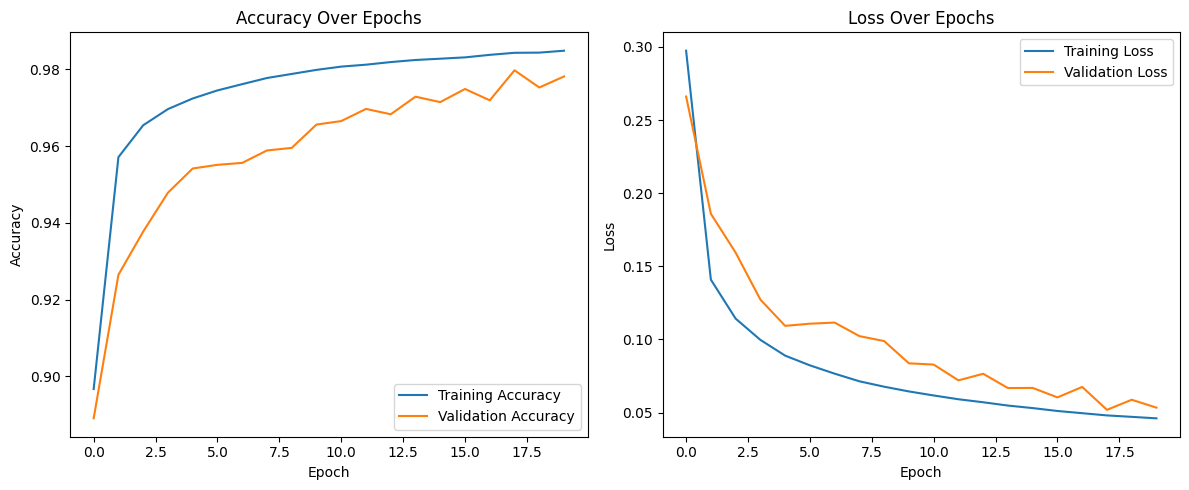

In [ ]:
plt.figure(figsize=(12, 5))

# ---- Accuracy ----
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# ---- Loss ----
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
from sklearn import metrics
from sklearn.metrics import precision_score, recall_score, f1_score

predicted = model.predict(X_test)
predicted_labels = (predicted > 0.5).astype(int)

# Model evaluation
print("precision_score    : ", precision_score(y_test, predicted_labels))
print("recall_score       : ", recall_score(y_test, predicted_labels))
print("f1_score           : ", f1_score(y_test, predicted_labels))

print("-----------------------------------------------------------------------")
df_data = pd.DataFrame({
    "Actual": y_test.values.ravel(),
    "Predicted": predicted_labels.flatten()
})
print(df_data.head(20))
print("-----------------------------------------------------------------------")

1774/1774 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step
precision_score    :  0.17798594847775176
recall_score       :  0.8444444444444444
f1_score           :  0.2940038684719536
-----------------------------------------------------------------------
    Actual  Predicted
0        0          0
1        0          0
2        0          0
3        0          0
4        0          0
5        0          0
6        0          0
7        0          0
8        0          0
9        0          0
10       0          0
11       0          0
12       0          0
13       0          0
14       0          0
15       0          0
16       0          0
17       0          0
18       0          0
19       0          0
-----------------------------------------------------------------------


In [ ]:

# import joblib
# joblib.dump(SVC, "svc.pkl")
# joblib.dump(scaler, "scaler.pkl")


In [ ]:
# joblib.dump(Random Forest Classifier, "rf_model.pkl")
